<a href="https://colab.research.google.com/github/GauravBhakte/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Importing The Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Importing the data
Data=pd.read_csv('/content/drive/MyDrive/datasets/data_YesBank_StockPrices.csv')

Data Inspection

In [15]:
#Checking For The Features
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [16]:
#Checking For The Shape Of The Data
Data.shape

(185, 5)

In [17]:
#Checking Data For the Top 5 Rows Of Data 
Data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [18]:
#Describe The Data
Data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [19]:
#Checking For The Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Data Cleaning

In [20]:
#Checking For The Null Values
Data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [21]:
#Checking For The Duplicate values
len(Data[Data.duplicated()])

0

In [22]:
## Required the changing data type of date 
# Here converted the data type of integer into Datetime using the string parse time 
from datetime import datetime
Data['Date']=Data['Date'].apply(lambda x:datetime.strptime(x,'%b-%y'))

In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Outliers

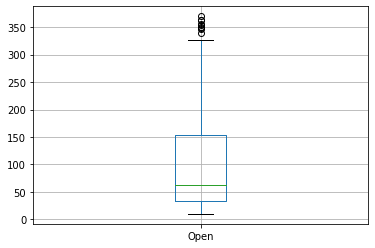

In [24]:

#Boxplot for Open Feature
Data.boxplot('Open')

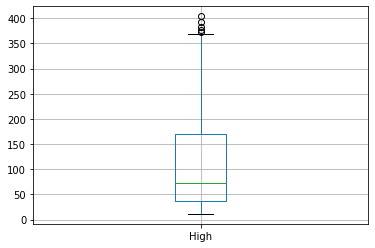

In [25]:
#Boxplot For High Feature
Data.boxplot('High')

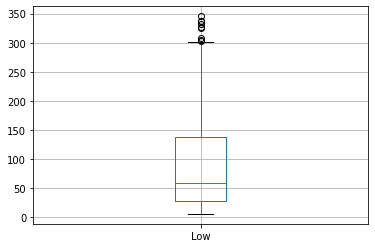

In [26]:
#Boxplot For Low Feature
Data.boxplot('Low')

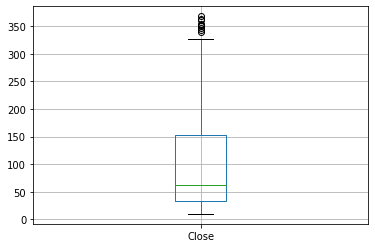

In [27]:
#Boxplot For Close Feature
Data.boxplot('Close')

Exploratory Data Analysis

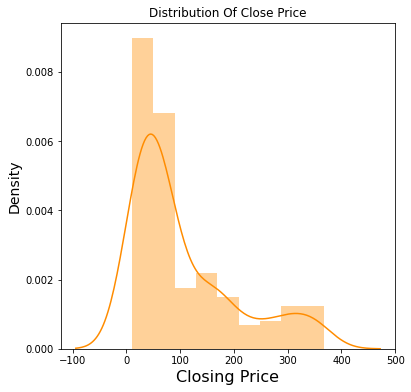

In [28]:
#Dependent Variables in Close
#Normal distribution
plt.figure(figsize=(6,6))
sns.distplot(Data['Close'],color="DarkOrange")
plt.title('Distribution Of Close Price')
plt.xlabel('Closing Price',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()


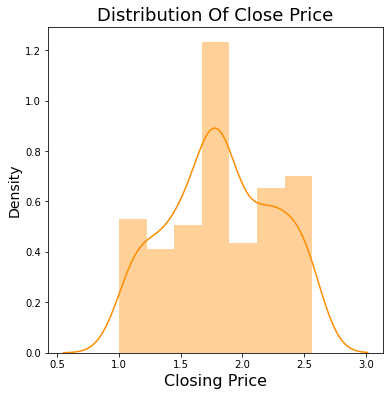

In [29]:
#Distribution Plot Of Closing Price For Applying Log Transformation
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Close']),color='DarkOrange')
plt.title('Distribution Of Close Price',fontsize=18)
plt.xlabel('Closing Price',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

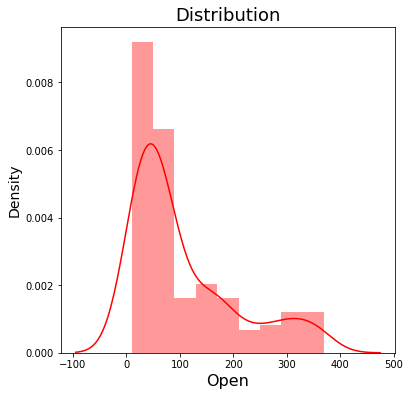

In [30]:
#Plotting Distribution For Each Features
#For Normal Distribution
#Plotting For Distribution Of Open
plt.figure(figsize=(6,6))
sns.distplot(Data['Open'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Open',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

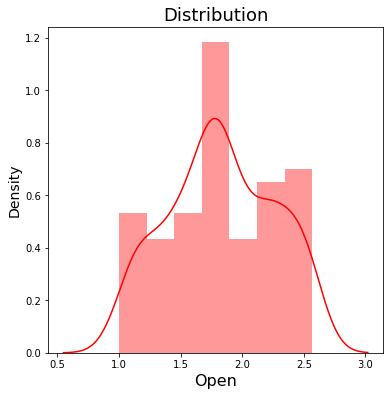

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Open']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Open',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

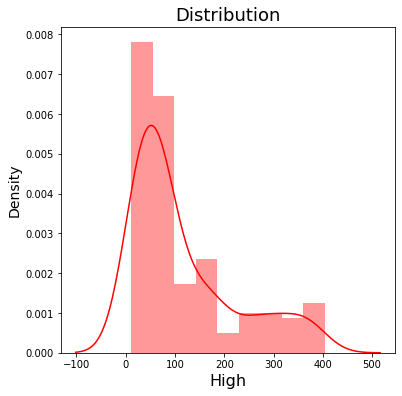

In [32]:

plt.figure(figsize=(6,6))
sns.distplot(Data['High'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('High',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

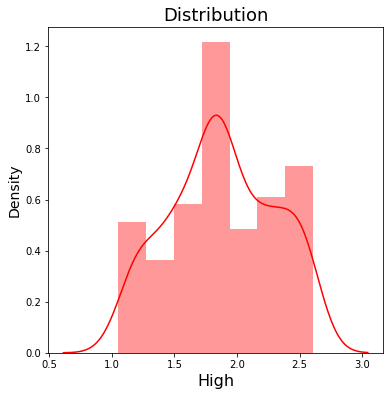

In [33]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['High']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('High',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

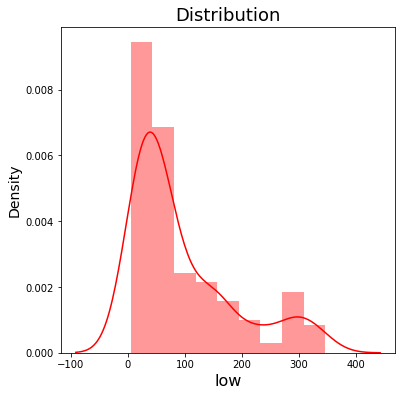

In [34]:
plt.figure(figsize=(6,6))
sns.distplot(Data['Low'],color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('low',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

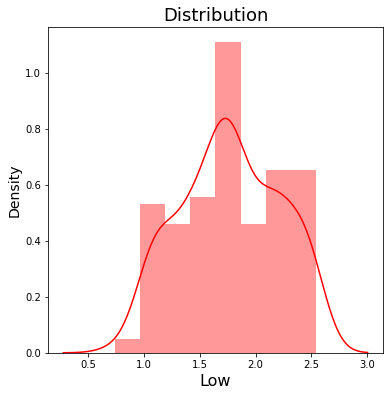

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(np.log10(Data['Low']),color='Red')
plt.title('Distribution',fontsize=18)
plt.xlabel('Low',fontsize=16)
plt.ylabel('Density',fontsize=14)
plt.show()

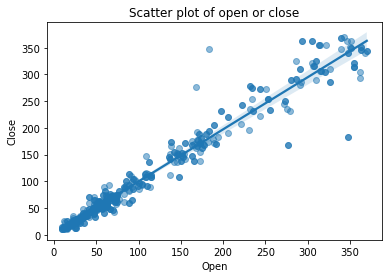

In [36]:
#Now find out the correlation between the Dependent variables and Independent Variables
#Scatter pot with best fit line
plt.scatter(Data['Close'],Data['Open'],alpha=0.5) 
plt.title('Scatter plot of open or close')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x='Open',y='Close',data=Data)
plt.show()

Correlation

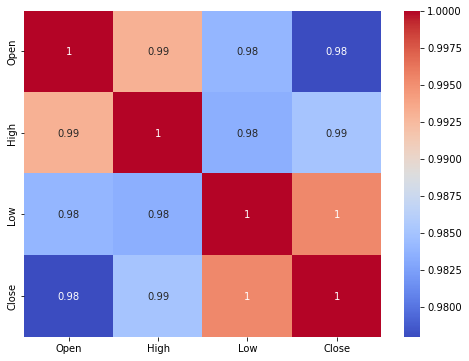

In [37]:
#Let's find out Correlation with heatmap
#Correlation
plt.figure(figsize=(8,6))
correlation=Data.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [40]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

In [41]:
cal_vif(Data[[i for i in Data.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [44]:
#Here we will drop the open feature from the VIP Matrix
cal_vif(Data[[i for i in Data.describe().columns if i not in ['Date','Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


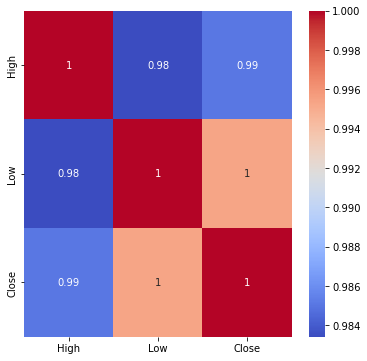

In [45]:
#Correlation of Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(Data[['High','Low','Close']].corr(),annot=True,cmap='coolwarm')
plt.show()